In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# List all files and folders in Google Drive
drive_path = "/content/drive/MyDrive"
files = os.listdir(drive_path)

print("Files in MyDrive:", files)

Files in MyDrive: ['DSC_7482.jpg', 'my-cv (1).pdf', 'Copy of my-cv.pdf', 'my-cv.pdf', 'Online Payment Options.pdf', 'Exchange Rate.gsheet', 'Colab Notebooks', 'ML', 'LR (1).docx', 'pp1.docx', 'Deliverable.docx', '2330907_20230221_Habarangamuwa.pdf', 'Lecture 2.pdf', 'dsgp (5).drawio', 'dsgp (4).drawio', 'dsgp (3).drawio', 'dsgp (2).drawio', 'dsgp (1).drawio', 'dsgp.drawio', 'Entry Level Tech Professional Resume (2) (1).pdf', 'Entry Level Tech Professional Resume (2).pdf', 'Resume Peer Review Form.docx', 'OOD', 'Plant_leaves_Datasets', 'maths1.ipynb', 'BananaK.zip', 'bananaMg.zip', 'Dsgp', 'Untitled30.ipynb', 'CoffeeMg.zip', 'CofeeeK.zip', 'CofeeIron.zip', 'BananaIron.zip']


In [ ]:
dataset_path = "/content/drive/MyDrive/"

zip_files = [
    dataset_path + "BananaK.zip",
    dataset_path + "bananaMg.zip",
    dataset_path + "CoffeeMg.zip",
    dataset_path + "CofeeeK.zip",
    dataset_path + "BananaIron.zip",
    dataset_path + "CofeeIron.zip"

]

In [ ]:
import zipfile

# Extract each zip file
for zip_path in zip_files:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/datasets")

print("✅ All datasets extracted successfully!")

✅ All datasets extracted successfully!


In [ ]:
extracted_folders = os.listdir("/content/datasets")
print("Extracted Folders:", extracted_folders)

Extracted Folders: ['potasium-K', 'magnesium', 'magnesium-Mg', 'iron-Fe', 'iron', 'potassium']


In [ ]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing import image

# Function to preprocess images (resize and convert to RGB)
def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Load the image
    img = cv2.resize(img, (224, 224))  # Resize to 224x224 for ResNet
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    return img

# Set paths for your datasets
dataset_path = "/content/datasets/"

# Prepare a list to store images and labels
images = []
labels = []

# Define severity levels (Mild, Moderate, Severe) for all deficiencies
severity_mapping = {
    'magnesium': [1, 0, 0],    # Mild Magnesium
    'magnesium-Mg': [0, 1, 0], # Moderate Magnesium
    'potasium-K': [0, 0, 1],  # Severe Potassium
    'potassium': [1, 0, 0],    # Mild Potassium
    'iron': [0, 1, 0],         # Moderate Iron
    'iron-Fe': [0, 0, 1]       # Severe Iron
}

# Load and preprocess images
for deficiency in severity_mapping:
    deficiency_path = os.path.join(dataset_path, deficiency)
    if os.path.exists(deficiency_path):  # Check if folder exists
        for img_name in os.listdir(deficiency_path):
            img_path = os.path.join(deficiency_path, img_name)
            img = preprocess_image(img_path)

            # Add the image and its label (mapped severity level)
            images.append(img)
            labels.append(severity_mapping[deficiency])
    else:
        print(f"⚠️ Warning: Directory '{deficiency}' not found, skipping...")

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(f"✅ {len(images)} images loaded and preprocessed successfully!")


✅ 697 images loaded and preprocessed successfully!


In [ ]:
from sklearn.model_selection import train_test_split

# Convert labels to numpy array
labels = np.array(labels)

# Split dataset into 80% training and 20% testing (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"✅ Training data size: {len(X_train)} samples")
print(f"✅ Test data size: {len(X_test)} samples")


✅ Training data size: 557 samples
✅ Test data size: 140 samples


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply augmentation ONLY to training images
X_train_augmented = np.array([
    next(datagen.flow(img.reshape((1, 224, 224, 3)), batch_size=1))[0]
    for img in X_train
])

print(f"✅ Data augmentation applied to {len(X_train_augmented)} images.")


✅ Data augmentation applied to 557 images.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

# Load pre-trained ResNet50 model (without the top classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Function to extract features
def extract_features(images):
    features = []
    for img in images:
        img_array = img_to_array(img)  # Convert to array
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = preprocess_input(img_array)  # Preprocess for ResNet50

        feature = base_model.predict(img_array)  # Extract features
        # print(feature)
        # print(feature.shape)
        feature = feature.flatten()  # Flatten into 1D vector
        # print(feature.shape)
        # feature += one_def
        # feature += one_plant
        features.append(feature)

    return np.array(features)

# Extract features from training & test sets
X_train_features = extract_features(X_train_augmented)  # Training features (after augmentation)
X_test_features = extract_features(X_test)  # Test features (without augmentation)

print(f"✅ Feature extraction completed for 3 deficiencies! {X_train_features.shape[0]} training samples processed.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━

In [ ]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (557, 3)
y_test shape: (140, 3)


In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Build the model
model = models.Sequential([
    layers.Dense(256, activation='relu', input_dim=X_train_features.shape[1]),  # Reduced complexity
    layers.Dropout(0.6),  # Increased dropout rate
    layers.Dense(128, activation='relu'),  # Reduced complexity
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),  # Reduced complexity
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),  # Reduced complexity
    layers.Dropout(0.2),
    layers.Dense(3, activation='softmax')  # Output layer (3 classes: Mild, Moderate, Severe)
])

# Compile the model
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping and Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Model summary
model.summary()

# Train the model with callbacks
history = model.fit(X_train_features, y_train, epochs=30, batch_size=32, validation_data=(X_test_features, y_test), callbacks=[early_stopping, reduce_lr])

# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test_features, y_test)
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,748,227 (98.22 MB)

 Trainable params: 25,748,227 (98.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - accuracy: 0.4247 - loss: 17.9101 - val_accuracy: 0.7643 - val_loss: 2.4660 - learning_rate: 0.0010
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5404 - loss: 8.9136 - val_accuracy: 0.7643 - val_loss: 1.3866 - learning_rate: 0.0010
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5824 - loss: 5.4561 - val_accuracy: 0.7786 - val_loss: 0.9490 - learning_rate: 0.0010
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5823 - loss: 4.7862 - val_accuracy: 0.7643 - val_loss: 1.3148 - learning_rate: 0.0010
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6099 - loss: 4.1941 - val_accuracy: 0.7429 - val_loss: 1.0109 - learning_rate: 0.0010
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6197 - loss: 2.1699 - val_accuracy: 0.7643 - val_loss: 0.5777 - learning_rate: 0.0010
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6677 - loss: 1.5607 - val_a

In [ ]:
# Print training accuracy for each epoch
print(f"Training Accuracy: {history.history['accuracy']}")

# Optionally, get the final training accuracy after the last epoch
final_training_accuracy = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {final_training_accuracy * 100:.2f}%")

Training Accuracy: [0.4865350127220154, 0.5260323286056519, 0.5942549109458923, 0.60502690076828, 0.6175942420959473, 0.60502690076828, 0.6409335732460022, 0.628366231918335, 0.6552962064743042, 0.6427289247512817, 0.6912028789520264, 0.6858168840408325, 0.7289048433303833, 0.6894075274467468, 0.7558348178863525, 0.7755835056304932, 0.7540395259857178, 0.7827647924423218, 0.7684021592140198, 0.7719928026199341, 0.7989227771759033, 0.8007181286811829, 0.7971274852752686, 0.8420107960700989, 0.836624801158905, 0.8725314140319824]
Final Training Accuracy: 87.25%


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


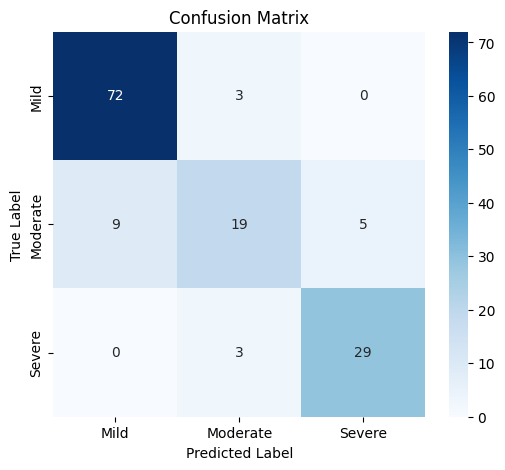

Classification Report:
               precision    recall  f1-score   support

        Mild       0.89      0.96      0.92        75
    Moderate       0.76      0.58      0.66        33
      Severe       0.85      0.91      0.88        32

    accuracy                           0.86       140
   macro avg       0.83      0.81      0.82       140
weighted avg       0.85      0.86      0.85       140



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get model predictions
y_pred = model.predict(X_test_features)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Mild', 'Moderate', 'Severe'], yticklabels=['Mild', 'Moderate', 'Severe'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report for precision, recall, F1-score
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=['Mild', 'Moderate', 'Severe']))